In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
df = pd.read_csv("auto-mpg.csv")

#Preprocessing

In [40]:
df.shape

(398, 9)

In [41]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [43]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [44]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [45]:
df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [46]:
df["horsepower"] = df["horsepower"].replace("?",np.nan).astype(float)

In [47]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [48]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [49]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.drop("car name", axis=1, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [53]:
df["model year"] = df["model year"] + 1900

In [54]:
df["power_to_weight"] = df["horsepower"] / df["weight"]
df["acc_per_disp"] = df["acceleration"] / df["displacement"]
df["cyl_per_disp"] = df["cylinders"] / df["displacement"]

In [55]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,power_to_weight,acc_per_disp,cyl_per_disp
0,18.0,8,307.0,130.0,3504,12.0,1970,1,0.037100,0.039088,0.026059
1,15.0,8,350.0,165.0,3693,11.5,1970,1,0.044679,0.032857,0.022857
2,18.0,8,318.0,150.0,3436,11.0,1970,1,0.043655,0.034591,0.025157
3,16.0,8,304.0,150.0,3433,12.0,1970,1,0.043694,0.039474,0.026316
4,17.0,8,302.0,140.0,3449,10.5,1970,1,0.040591,0.034768,0.026490


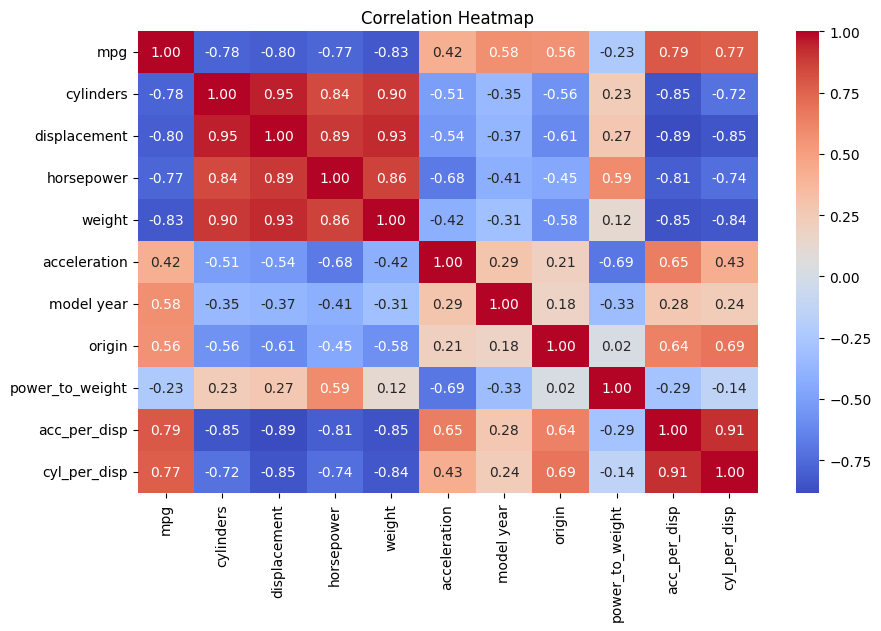

In [56]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [57]:
corr = df.corr()["mpg"].drop("mpg")
selected_features = corr[abs(corr) > 0.3].index.tolist()
X = df[selected_features]
y = df["mpg"]

print("\nCorrelation values with mpg:")
print(corr[abs(corr) > 0.3].round(2))


Correlation values with mpg:
cylinders      -0.78
displacement   -0.80
horsepower     -0.77
weight         -0.83
acceleration    0.42
model year      0.58
origin          0.56
acc_per_disp    0.79
cyl_per_disp    0.77
Name: mpg, dtype: float64


In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

#Data Visualization

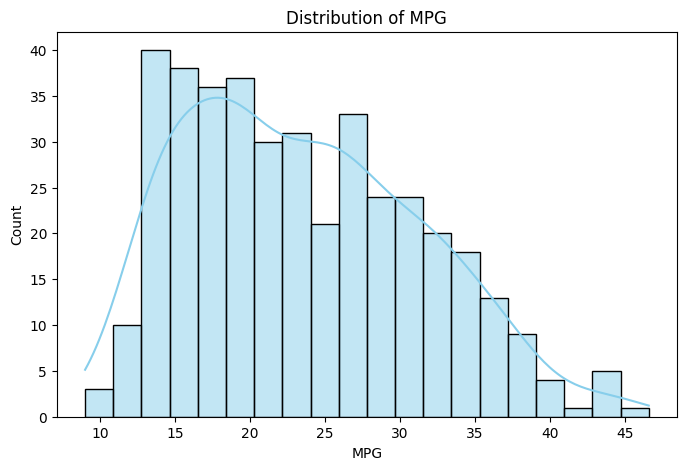

In [59]:
# Distribution of MPG
plt.figure(figsize=(8,5))
sns.histplot(df["mpg"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of MPG")
plt.xlabel("MPG")
plt.ylabel("Count")
plt.show()

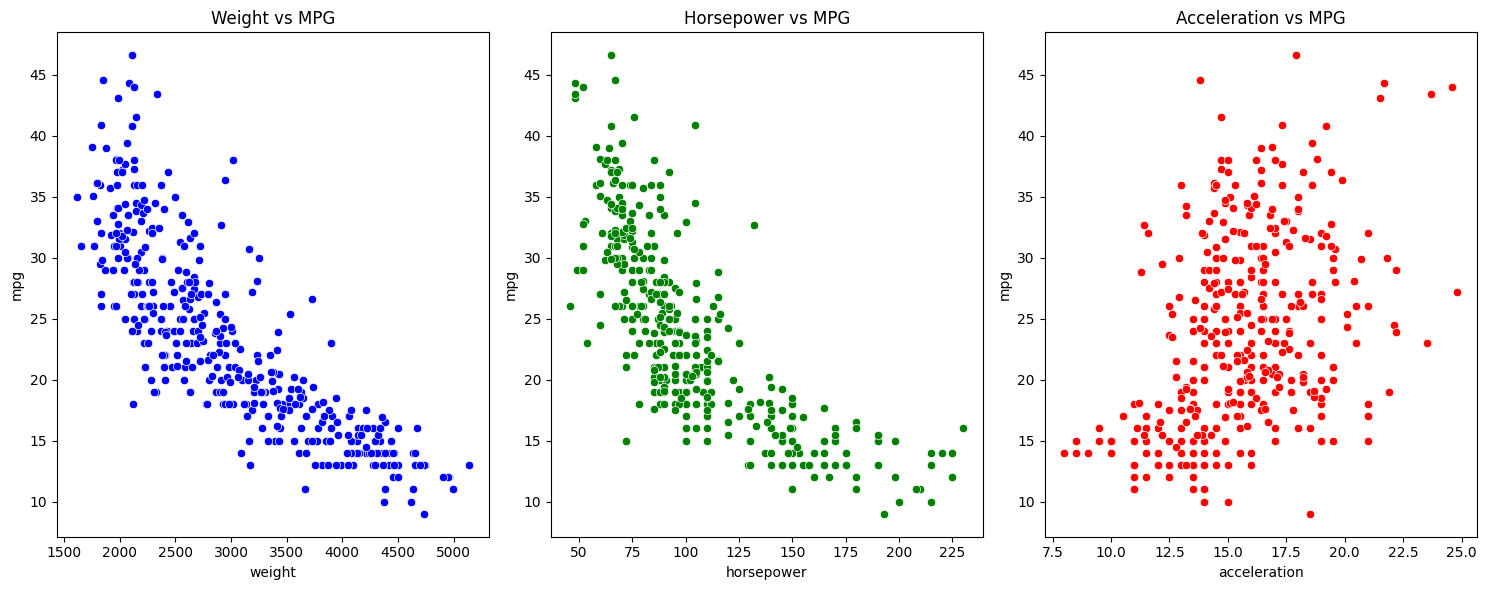

In [60]:
# Scatterplots with Target
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.scatterplot(x=df["weight"], y=df["mpg"], color="blue")
plt.title("Weight vs MPG")

plt.subplot(1,3,2)
sns.scatterplot(x=df["horsepower"], y=df["mpg"], color="green")
plt.title("Horsepower vs MPG")

plt.subplot(1,3,3)
sns.scatterplot(x=df["acceleration"], y=df["mpg"], color="red")
plt.title("Acceleration vs MPG")

plt.tight_layout()
plt.show()

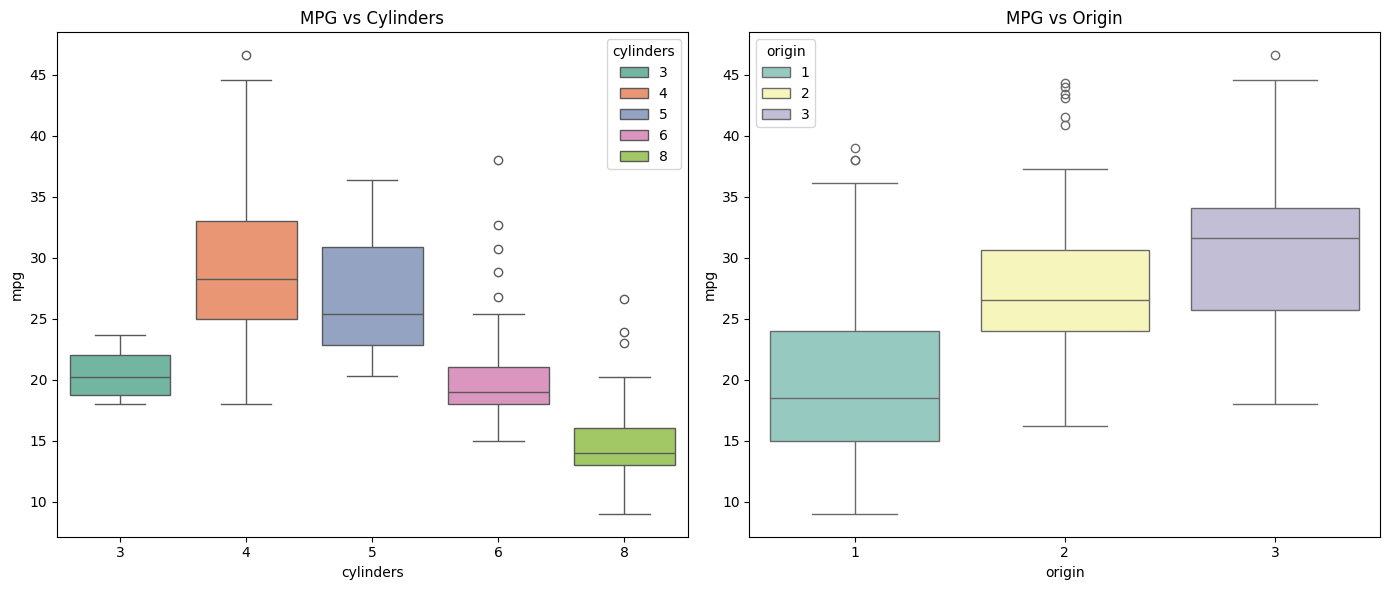

In [61]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="cylinders", y="mpg", data=df, hue="cylinders", palette="Set2", legend=True)
plt.title("MPG vs Cylinders")

plt.subplot(1, 2, 2)
sns.boxplot(x="origin", y="mpg", data=df, hue="origin", palette="Set3", legend=True)
plt.title("MPG vs Origin")

plt.tight_layout()
plt.show()

#Modeling

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
print("R2 Score:", round(r2_score(y_test, y_pred), 3))
print("MSE:", round(mean_squared_error(y_test, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))

R2 Score: 0.87
MSE: 6.992
RMSE: 2.644


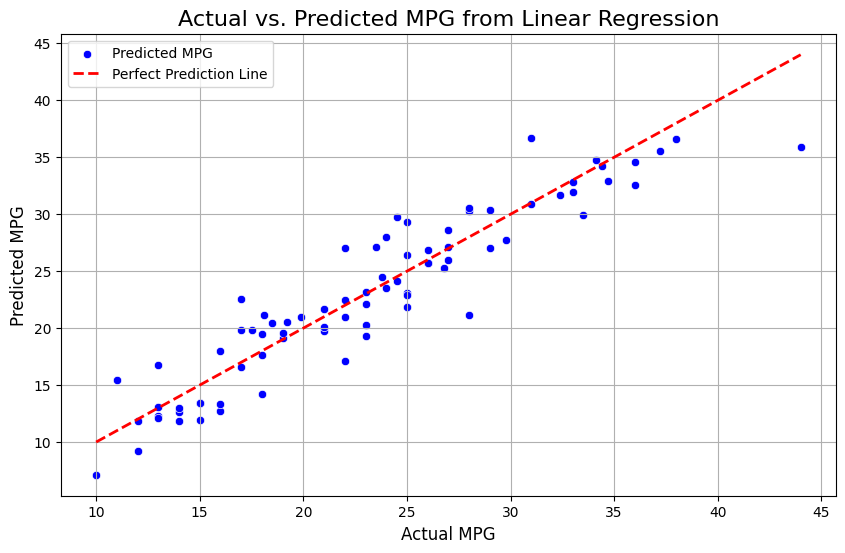

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_test, y = y_pred, color='blue', label='Predicted MPG')

# Plot a red diagonal line (x=y)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction Line')
plt.title('Actual vs. Predicted MPG from Linear Regression', fontsize=16)
plt.xlabel('Actual MPG', fontsize=12)
plt.ylabel('Predicted MPG', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()